In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob as g
import os
import fnmatch
import datetime
%matplotlib inline

sns.set(rc={'figure.figsize':(15,8)})
sns.set_color_codes("pastel")
sns.set(style="whitegrid", context="talk")

In [14]:
dir_path = os.path.dirname(os.path.realpath('/home/ruiany/Desktop/data/*'))

In [26]:
file_list = []
for file in os.listdir(dir_path):
    if fnmatch.fnmatch(file, '*.tsv'):
        file_list.append(file)

In [28]:
file_dict = {}
for file in file_list:
    file_dict[file] = pd.read_csv(dir_path +'/'+ file, sep='\t', header=0) 

/home/ruiany/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ruiany/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [246]:
df_movies = file_dict['title_basics.tsv'][file_dict['title_basics.tsv'].titleType == 'movie'].dropna()
df_us = file_dict['title_akas.tsv'][file_dict['title_akas.tsv'].region == 'US'].dropna()

df_movies = df_movies[df_movies.tconst.isin(df_us['titleId'].values.tolist())]

df_movies = df_movies[df_movies.startYear != '\\N']
df_movies = df_movies[df_movies.startYear != '2115']
df_movies = df_movies[df_movies.genres != '\\N']
df_movies = df_movies[df_movies.runtimeMinutes != '\\N']

df_movies['startYear'] = df_movies['startYear'].apply(pd.to_numeric)
df_movies['runtimeMinutes'] = df_movies['runtimeMinutes'].apply(pd.to_numeric)
df_movies = df_movies[df_movies.runtimeMinutes < 50000]

decade_list = (df_movies.startYear//10)*10
df_movies['decade'] = decade_list
df_movies = df_movies.join(df_movies['genres'].str.split(',', expand=True).add_prefix('genres'))

df_movies = df_movies[~df_movies['genres0'].isin(['Musical', 'Music','Short','Sport','Family','Film-Noir',
                                                  'Adult','News', 'Talk-Show', 
                                                  'Reality-TV', 'Game-Show'])]

df_movies['genres0'] = df_movies['genres0'].replace(to_replace =["Sci-Fi", "Fantasy"],  value ="Fantasy/Sci-Fi") 
df_movies['genres0'] = df_movies['genres0'].replace(to_replace =["Horror", "Thriller",'Mystery'],  value ="Horror/Thriller")
df_movies['genres0'] = df_movies['genres0'].replace(to_replace = "Musical",  value ="Music") 
df_movies['genres0'] = df_movies['genres0'].replace(to_replace =["Adventure", 'Action'],  value ="Action") 
df_movies['genres0'] = df_movies['genres0'].replace(to_replace =["Crime", 'War'],  value ="War/Crime") 
df_movies['genres0'] = df_movies['genres0'].replace(to_replace =["Biography", 'Documentary'],  value ="Documentary") 

Text(0.5, 1.0, 'Movie Genre Popularity')

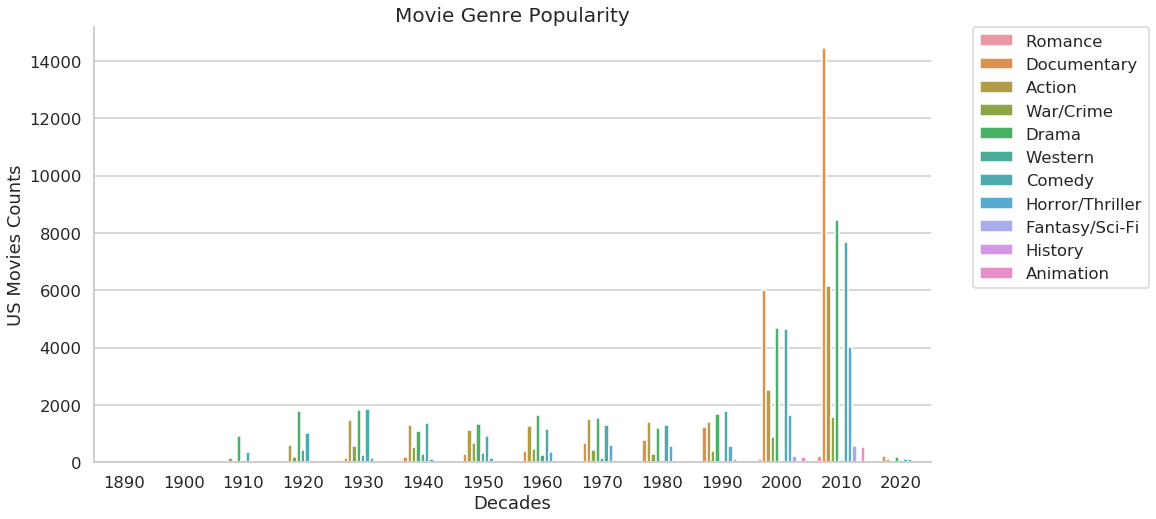

In [267]:
ax = sns.countplot(x='decade', data = df_movies,hue='genres0')
ax.set(ylabel="US Movies Counts",xlabel="Decades")
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Movie Genre Popularity', fontsize = 20)

Text(0.5, 1.0, 'Movie Runtime')

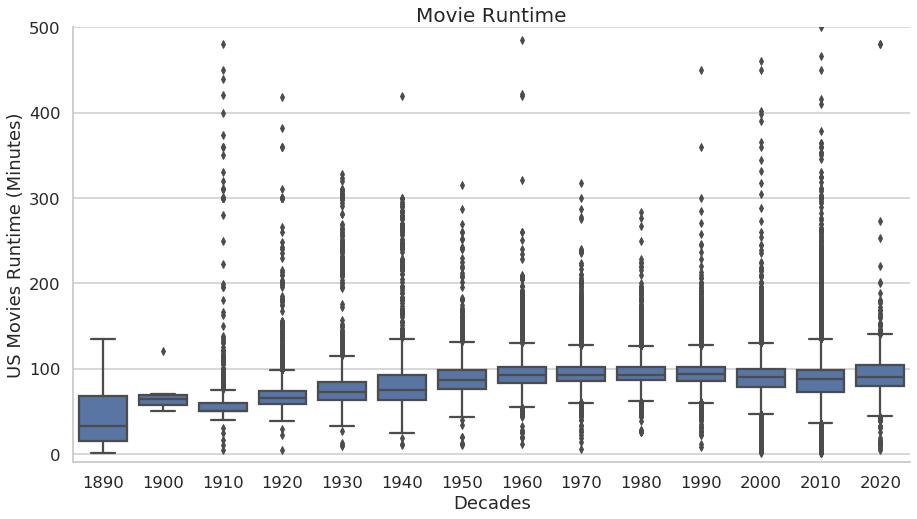

In [268]:
ax = sns.boxplot(x="decade", y="runtimeMinutes", data=df_movies,color='b')
ax.set(ylabel="US Movies Runtime (Minutes)",xlabel="Decades")
sns.despine()
plt.ylim(-10,500)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Movie Runtime', fontsize = 20)

In [264]:
df_ratings = file_dict['title_ratings.tsv']
df_merge = df_movies.merge(df_ratings, on='tconst')

Text(0.5, 1.0, 'Movie Ratings')

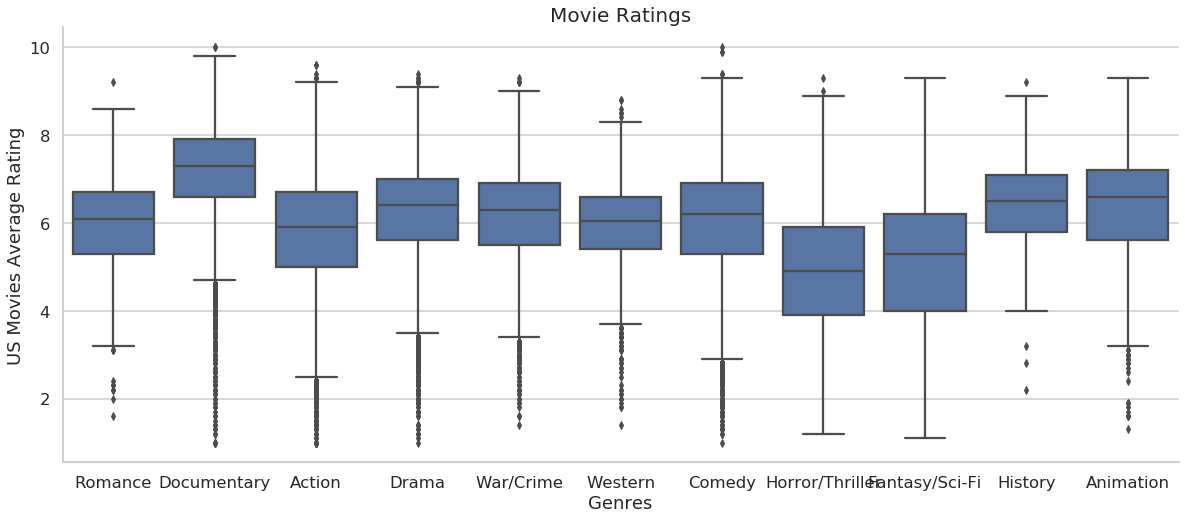

In [271]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set(style="whitegrid", context="talk")
ax = sns.boxplot(x="genres0", y="averageRating", data=df_merge,color='b')
ax.set(ylabel="US Movies Average Rating",xlabel="Genres")
sns.despine()
#plt.ylim(-10,500)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Movie Ratings', fontsize = 20)

In [272]:
df_merge.to_csv(dir_path+'/imdb_us_movies.csv')